In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json

In [2]:
def params_label(params):
    
    label = '';
    
    for k in params.keys():
        
        v = params[k]
        
        if type(v) == dict:
            label += params_label(v)
        else:

            abb = {
                'optimize_segments':'sopt',
                'prm_build_time': 't_prm',
                'samples_per_goal':'k',
                'timePerAppleSeconds':'tpa',
                'apply_shellstate_optimization':'shopt',
                'useImprovisedSampler':'imp',
                'tryLuckyShots':'l',
                'useCostConvergence':'conv',
                'GreatCircle':'GC'
            }
            
            k = abb.get(k,k)
            

            if type(v) == bool:
                if v:
                    label += '({})'.format(k)
            elif type(v) == str:
                label += '({})'.format(abb.get(v,v))
            else:
                label += '({}:{})'.format(k,v)
    
    return label

In [3]:
with open('full_experiment.json') as f:
    run_data = json.load(f)
    
track_stats = ['goals_visited', 'final_path_length','run_time']

run_stats = [
    {
        'goals_visited': run['goals_visited'],
        'final_path_length': run['final_path_length'],
        'length_per_goal': run['final_path_length']/run['goals_visited'],
        'run_time': run['run_time'],
        'start_state': run['start_state'],
        'planner': run['planner_name'],
        'label': params_label(run['planner_params'])
    }
    for run in run_data
]

run_stats = pd.DataFrame(run_stats)

In [4]:
agged = run_stats.groupby(
    ['planner','label']
)[['goals_visited','length_per_goal','run_time']].agg(['mean','sem'])

In [5]:
agged

goals_visited  \
                                                                  mean   
planner          label                                                   
Multigoal PRM*   (sopt)(t_prm:1.0)(k:2)                          129.8   
                 (sopt)(t_prm:1.0)(k:3)                          143.6   
                 (sopt)(t_prm:1.0)(k:4)                          150.6   
                 (sopt)(t_prm:1.0)(k:5)                          159.0   
                 (sopt)(t_prm:1.0)(k:6)                          161.4   
...                                                                ...   
ShellPathPlanner (shopt)(GC)(PRM)(tpa:1.0)(imp)                  163.8   
                 (shopt)(GC)(PRM)(tpa:1.0)(l)                    163.4   
                 (shopt)(GC)(PRM)(tpa:1.0)(l)(conv)              163.8   
                 (shopt)(GC)(PRM)(tpa:1.0)(l)(conv)(imp)         163.6   
                 (shopt)(GC)(PRM)(tpa:1.0)(l)(imp)               162.6   

                                                                    \
                                                               sem   
planner          label                                               
Multigoal PRM*   (sopt)(t_prm:1.0)(k:2)                   3.852272   
                 (sopt)(t_prm:1.0)(k:3)                   2.803569   
                 (sopt)(t_prm:1.0)(k:4)                   3.155947   
                 (sopt)(t_prm:1.0)(k:5)                   1.224745   
                 (sopt)(t_prm:1.0)(k:6)                   0.509902   
...                                                            ...   
ShellPathPlanner (shopt)(GC)(PRM)(tpa:1.0)(imp)           0.374166   
                 (shopt)(GC)(PRM)(tpa:1.0)(l)             0.400000   
                 (shopt)(GC)(PRM)(tpa:1.0)(l)(conv)       0.489898   
                 (shopt)(GC)(PRM)(tpa:1.0)(l)(conv)(imp)  0.244949   
                 (shopt)(GC)(PRM)(tpa:1.0)(l)(imp)        0.244949   

                                                         length_per_goal  \
                                                                    mean   
planner          label                                                     
Multigoal PRM*   (sopt)(t_prm:1.0)(k:2)                         5.129774   
                 (sopt)(t_prm:1.0)(k:3)                         4.503301   
                 (sopt)(t_prm:1.0)(k:4)                         4.354997   
                 (sopt)(t_prm:1.0)(k:5)                         4.237440   
                 (sopt)(t_prm:1.0)(k:6)                         3.905470   
...                                                                  ...   
ShellPathPlanner (shopt)(GC)(PRM)(tpa:1.0)(imp)                 3.559516   
                 (shopt)(GC)(PRM)(tpa:1.0)(l)                   2.457398   
                 (shopt)(GC)(PRM)(tpa:1.0)(l)(conv)             3.298856   
                 (shopt)(GC)(PRM)(tpa:1.0)(l)(conv)(imp)        2.927687   
                 (shopt)(GC)(PRM)(tpa:1.0)(l)(imp)              2.081908   

                                                                    \
                                                               sem   
planner          label                                               
Multigoal PRM*   (sopt)(t_prm:1.0)(k:2)                   0.064682   
                 (sopt)(t_prm:1.0)(k:3)                   0.058347   
                 (sopt)(t_prm:1.0)(k:4)                   0.089278   
                 (sopt)(t_prm:1.0)(k:5)                   0.091857   
                 (sopt)(t_prm:1.0)(k:6)                   0.061206   
...                                                            ...   
ShellPathPlanner (shopt)(GC)(PRM)(tpa:1.0)(imp)           0.026948   
                 (shopt)(GC)(PRM)(tpa:1.0)(l)             0.037482   
                 (shopt)(GC)(PRM)(tpa:1.0)(l)(conv)       0.060800   
                 (shopt)(GC)(PRM)(tpa:1.0)(l)(conv)(imp)  0.043050   
                 (shopt)(GC)(PRM)(tpa:1.0)(l)(imp)        0.0381

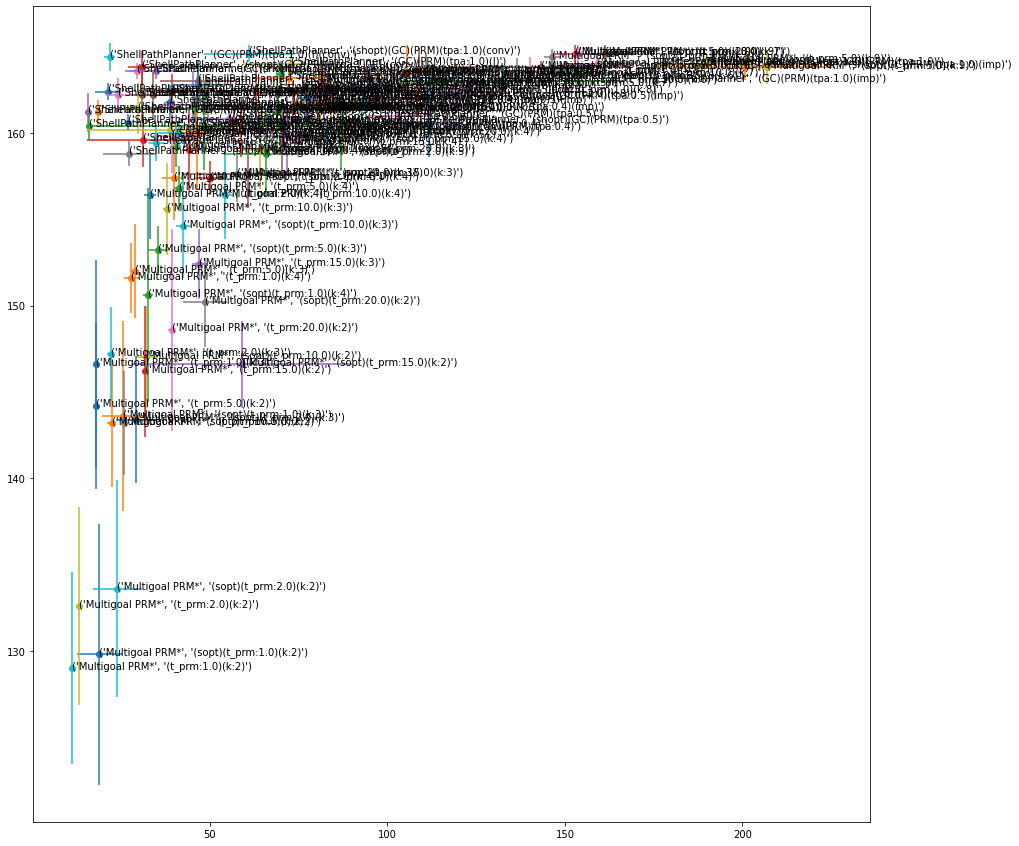

In [6]:
plt.figure(figsize=(15,15))

for index,row in agged.iterrows():
    
    x,xerr=row['run_time']
    y,yerr=row['goals_visited']
    
    plt.scatter(x,y)
    plt.errorbar(x,y,xerr=1.96*xerr,yerr=1.96*yerr)
    
    plt.annotate(str(index), (x,y))
    

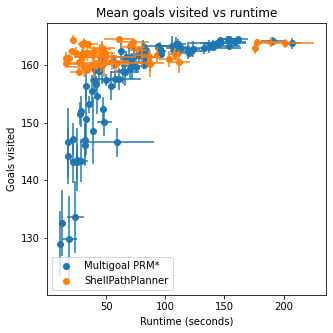

In [7]:
plt.figure(figsize=(5,5))

for planner,data in agged.groupby('planner'):
    x=data['run_time']['mean']
    xerr=data['run_time']['sem']

    y=data['goals_visited']['mean']
    yerr=data['goals_visited']['sem']

    plt.scatter(x,y,label=planner)
    plt.errorbar(x,y,xerr=1.96*xerr,yerr=1.96*yerr,fmt='',linestyle='')

plt.title('Mean goals visited vs runtime')
plt.xlabel('Runtime (seconds)')
plt.ylabel('Goals visited')
plt.legend()

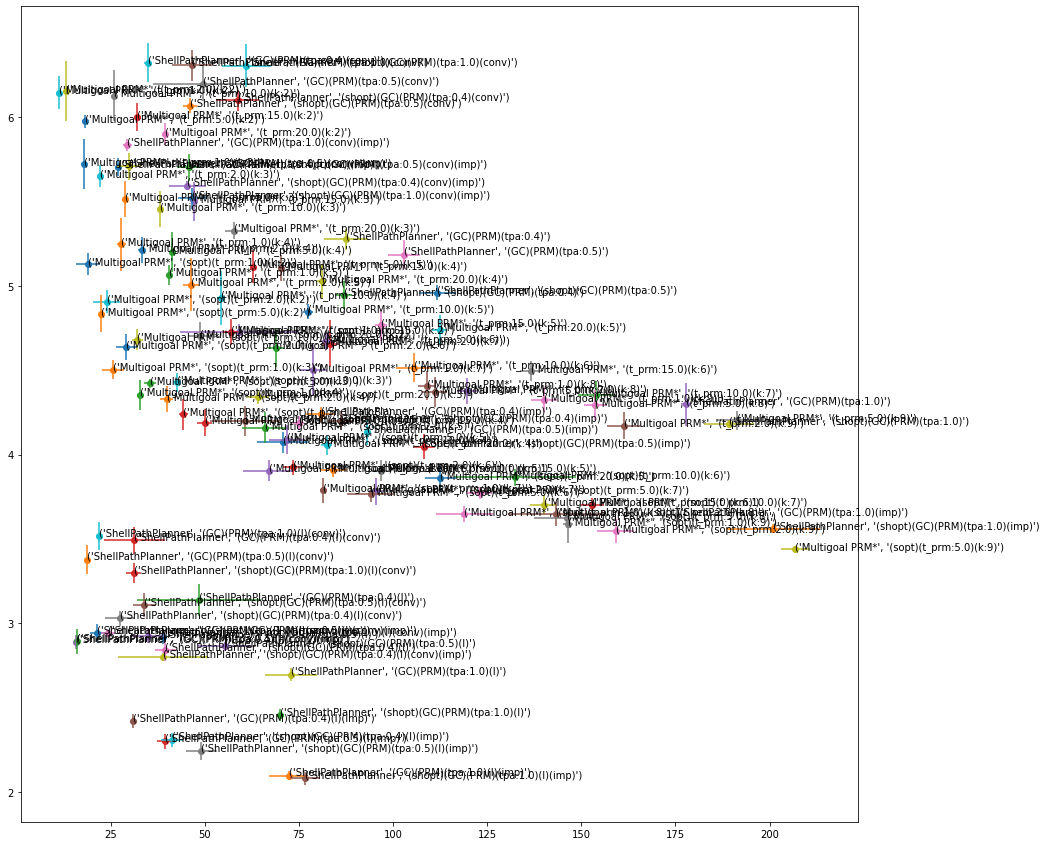

In [8]:
plt.figure(figsize=(15,15))

for index,row in agged.iterrows():
    
    x,xerr=row['run_time']
    y,yerr=row['length_per_goal']
    
    plt.scatter(x,y)
    plt.errorbar(x,y,xerr=xerr,yerr=yerr)
    
    plt.annotate(str(index), (x,y))
    

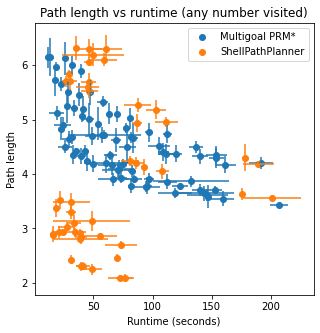

In [9]:
plt.figure(figsize=(5,5))

for planner,data in agged.groupby('planner'):
    x=data['run_time']['mean']
    xerr=data['run_time']['sem']

    y=data['length_per_goal']['mean']
    yerr=data['length_per_goal']['sem']

    plt.scatter(x,y,label=planner)
    plt.errorbar(x,y,xerr=1.96*xerr,yerr=1.96*yerr,fmt='',linestyle='')

plt.title('Path length vs runtime (any number visited)')
plt.xlabel('Runtime (seconds)')
plt.ylabel('Path length')
plt.legend()

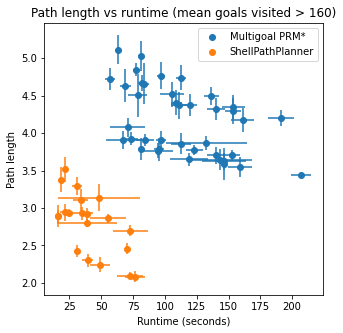

In [49]:
plt.figure(figsize=(5,5))

filtered = agged[agged['goals_visited']['mean'] > 160]
filtered = filtered[[planner != 'ShellPathPlanner' or ('(l)' in label) for (planner, label) in filtered.index.values]]

for planner,data in filtered.groupby('planner'):
    x=data['run_time']['mean']
    xerr=data['run_time']['sem']

    y=data['length_per_goal']['mean']
    yerr=data['length_per_goal']['sem']

    plt.scatter(x,y,label=planner)
    plt.errorbar(x,y,xerr=1.96*xerr,yerr=1.96*yerr,fmt='',linestyle='')

plt.title('Path length vs runtime (mean goals visited > 160)')
plt.xlabel('Runtime (seconds)')
plt.ylabel('Path length')
plt.legend()

plt.savefig('figures/length_vs_runtime.pdf')

In [11]:
spdf = pd.json_normalize([run for run in run_data if run['planner_name'] == 'ShellPathPlanner'])
spdf['length_per_goal'] = spdf['final_path_length']/spdf['goals_visited']

spdf = spdf.rename(columns={
    'planner_params.ptp.timePerAppleSeconds':'ptp_time',
    'planner_params.ptp.ptp':'ptp',
    'planner_params.ptp.useImprovisedSampler':'inf',
    'planner_params.distance_heuristics':'heur',
    'planner_params.ptp.tryLuckyShots':'lucky',
    'planner_params.apply_shellstate_optimization':'shellopt',
    'planner_params.ptp.useCostConvergence':'conv'
})

spdf.head()

,final_path_length,goals_visited,planner_name,run_time,start_state,shellopt,heur,ptp,ptp_time,lucky,conv,inf,length_per_goal
0,544.833616,165,ShellPathPlanner,21.111654,4,False,GreatCircle,PRM,1.0,True,True,False,3.302022
1,478.942459,162,ShellPathPlanner,21.837134,4,True,GreatCircle,PRM,0.5,True,True,True,2.956435
2,480.852386,164,ShellPathPlanner,22.449392,3,True,GreatCircle,PRM,0.5,True,True,True,2.932027
3,493.382967,163,ShellPathPlanner,26.292496,2,True,GreatCircle,PRM,1.0,True,True,True,3.026889
4,407.402236,164,ShellPathPlanner,31.214903,0,False,GreatCircle,PRM,0.4,True,False,True,2.484160


In [12]:
param_columns = set(spdf.columns) - set(['final_path_length','length_per_goal','goals_visited','planner_name','run_time','start_state'])

spdf_agg = spdf.groupby(list(param_columns)).agg(['mean','sem'])[['length_per_goal']]

/tmp/ipykernel_56943/3108587273.py:3: FutureWarning: ['planner_name'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  spdf_agg = spdf.groupby(list(param_columns)).agg(['mean','sem'])[['length_per_goal']]


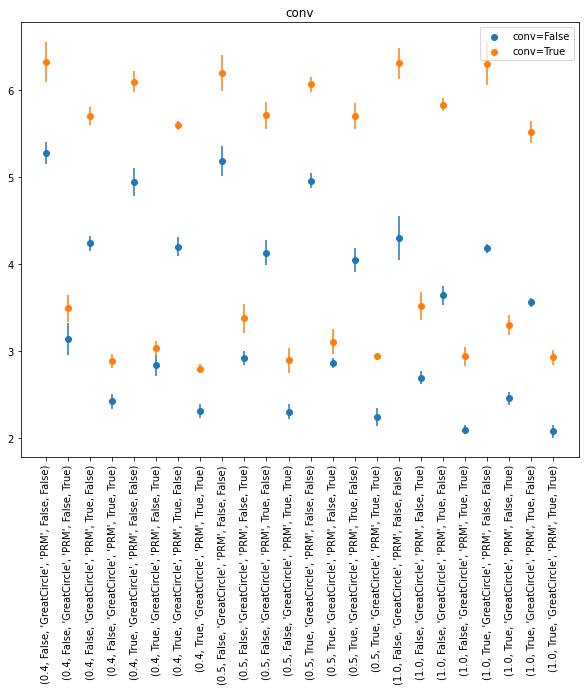

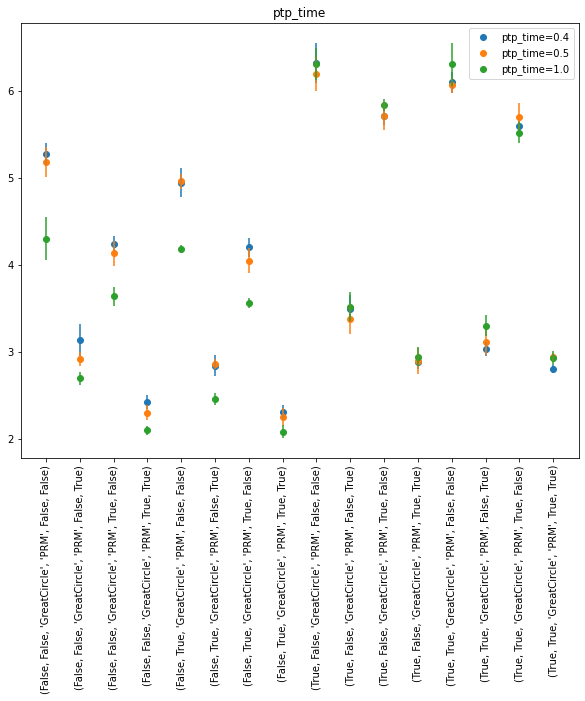

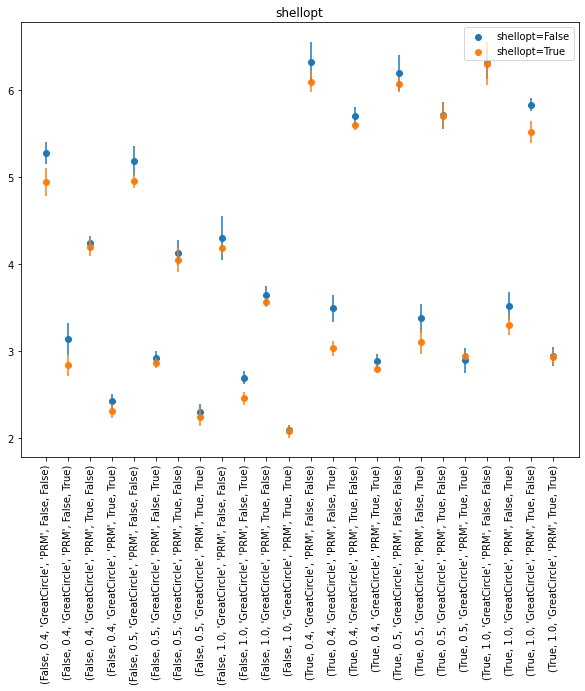

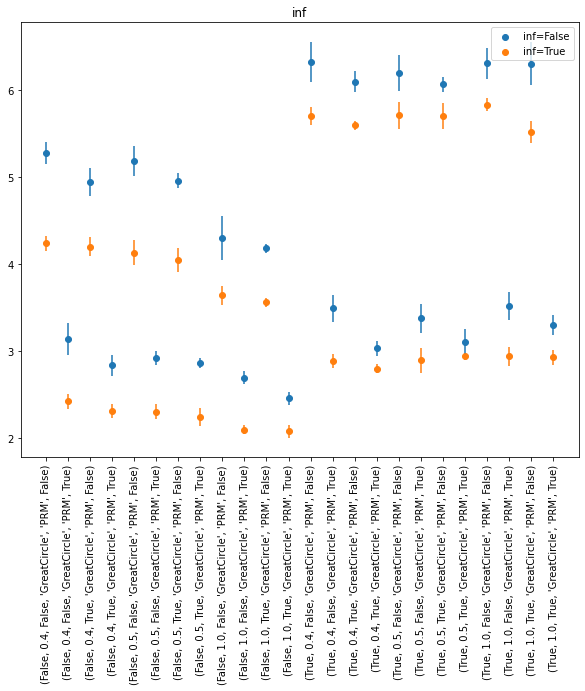

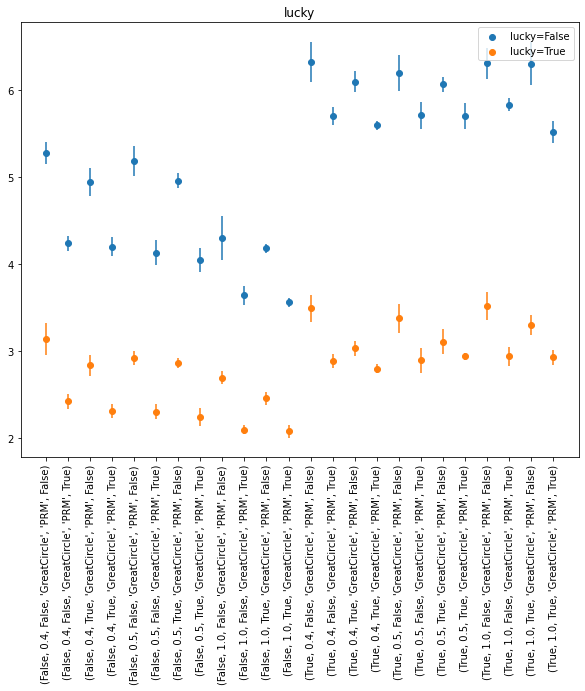

In [15]:
for param in param_columns:

    piv_df = spdf_agg.pivot_table(columns=param, index=list(param_columns-{param}))
    
    if len(piv_df['length_per_goal']['mean'].columns) == 1:
            continue
            
    plt.figure(figsize=(10,8))
    
    
    
    for col in piv_df['length_per_goal']['mean'].columns:

        plt.scatter(x=[str(t) for t in piv_df['length_per_goal']['mean'][col].index], 
                    y=piv_df['length_per_goal']['mean'][col].values,
                    label='{}={}'.format(param,col))
        
        plt.errorbar(
            x=[str(t) for t in piv_df['length_per_goal']['mean'][col].index], 
            y=piv_df['length_per_goal']['mean'][col].values,
            yerr=1.96*piv_df['length_per_goal']['sem'][col].values,
            linestyle=''
        )

    plt.xticks(rotation = 90)

    plt.legend()
    
    plt.title(param)